In [3]:
%matplotlib inline

import os
import numpy as np
from scipy.stats import binom_test
import matplotlib.pyplot as plt

In [4]:
output_dir =  os.path.join('..', 'output')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

[61 60 64 69 69 64 53 71 61 64]
[17 20 17 16 17 15 12 20 17 18]


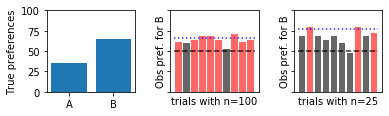

In [5]:
np.random.seed(716)

b = 0.65

fig, axes = plt.subplots(ncols=3, figsize=(6, 1.5), sharey=True)
plt.subplots_adjust(wspace=0.4)
axes[0].bar([0, 1], [100*(1-b), 100*b])
axes[0].set_ylim(0, 100)
axes[0].set_xticks([0, 1])
#axes[0].plot([-0.5, 2-0.5], [100*b, 100*b], 'b--', alpha=0.8, label=None)
axes[0].set_xticklabels(['A', 'B'])
axes[0].set_ylabel('True preferences')

n = 100
r = 10
vals = np.random.binomial(n, p=b, size=r)
print(vals)
axes[1].plot([-0.5, r-0.5], [50, 50], 'k--', alpha=0.8, label=None)
pvals = []
for x in vals:
    pvals.append(binom_test(x, n=n))
for i, x in enumerate(vals):
    if pvals[i] < 0.05 and x > 0.5:
        c = 'r'
    else:
        c = 'k'
    axes[1].bar([i], [x/n*100], facecolor=c, alpha=0.6)
sig_mean = np.mean([v/n*100 for i, v in enumerate(vals) if pvals[i] < 0.05])
axes[1].plot([-0.5, r-0.5], [sig_mean, sig_mean], c='b', linestyle=':', alpha=0.8, label=None)    
axes[1].set_ylim(0, 100)
axes[1].set_ylabel('Obs pref. for B')
axes[1].set_xlabel('trials with n={:d}'.format(n))
axes[1].set_xticks([])

n = 25
r = 10
vals = np.random.binomial(n, p=b, size=r)
print(vals)
axes[2].plot([-0.5, r-0.5], [50, 50], 'k--', alpha=0.8, label=None)
pvals = []
for x in vals:
    pvals.append(binom_test(x, n=n))
for i, x in enumerate(vals):
    if pvals[i] < 0.05 and x > 0.5:
        c = 'r'
    else:
        c = 'k'
    axes[2].bar([i], [x/n*100], facecolor=c, alpha=0.6)
sig_mean = np.mean([v/n*100 for i, v in enumerate(vals) if pvals[i] < 0.05])
axes[2].plot([-0.5, r-0.5], [sig_mean, sig_mean], c='b', linestyle=':', alpha=0.8, label=None)
axes[2].set_ylim(0, 100)
axes[2].set_ylabel('Obs pref. for B')
axes[2].set_xlabel('trials with n={:d}'.format(n))
axes[2].set_xticks([])

plt.savefig(os.path.join(output_dir, 'Figure01.pdf'), bbox_inches='tight');
plt.show();

In [ ]:
pvals = []
b = 0.65
r = 100000
n = 100
vals = np.random.binomial(n, p=b, size=r)
for x in vals:
    pvals.append(binom_test(x, n=n))
print(np.sum(np.array(pvals) < 0.05)/r)

In [80]:
pvals = []
r = 100000
n = 25
vals = np.random.binomial(n, p=b, size=r)
for x in vals:
    pvals.append(binom_test(x, n=n))
print(np.sum(np.array(pvals) < 0.05)/r)

0.30636
